<a href="https://colab.research.google.com/github/ErnestoMedina99/Estadistica/blob/master/7Prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Se importan las librerías
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, legend, title, savefig
from matplotlib.font_manager import FontProperties
from matplotlib import pylab
from scipy.optimize import curve_fit
import random
import math

In [77]:
from IPython.display import HTML, Math
display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/"
             "latest.js?config=default'></script>"))

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
#Comando para darle una estética distinta a las gráficas.
sns.set(rc={'figure.figsize':(12,12)})
figure(1, figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

1. Los siguientes datos representan el nùmero de aciertos obtenidos por tres algoritmos clasificadores en un total de 20 casos diferentes durante 10 ejecuciones. Este tipo de algoritmos se utilizan en biologìa para clasificar nuevas plantas con respecto a un conjunto de variedades de plantas conocidas, con base a aspectos como tiempo para germinar, color del tallo y de la hoja, forma de la hoja, etc. En medicina se utilizan para clasificar pacientes con riesgo de contraer cierta enfermedad como cáncer o diabetes, tomando en cuenta, por ejemplo, sexo, edad, si es o no fumador, antecedentes familiares, etc. La clasificación “automática” en la minerìa de datos, generalmente se obtiene por medio de un algoritmo de inteligencia artificial el cual utiliza un conjunto de entrenamiento para su aprendizaje inicial antes de clasificar casos desconocidos.



In [41]:
#Problema 1:

#Leer el archivo de texto de la 1
df1 = pd.read_csv('/content/drive/My Drive/Estadística/7Problemas/1.csv')
df1

,Algoritmo1,Algoritmo2,Algoritmo3
0,18,10,15
1,9,13,10
2,13,14,4
3,20,12,18
4,14,12,6
5,4,14,8
6,16,11,12
7,10,16,16
8,14,14,7
9,18,12,10


a) Considerando la media y la desviación estándar (o la varianza) ¿Cual algoritmo tuvo mejor desempeño y por qué?

In [0]:
#Calculando la media y la desviación estándar

media = df1.mean(axis = 0, skipna = True)

s = df1.std(axis = 0, skipna = True)


In [43]:
#Media
media

 Algoritmo1    13.6
Algoritmo2     12.8
Algoritmo3     10.6
dtype: float64

In [44]:
#Desviación estándar
s

 Algoritmo1    4.857983
Algoritmo2     1.751190
Algoritmo3     4.599517
dtype: float64

Basándonos en el criterio de la media, el algoritmo 1 tiene una media de 13.6, superando el 12.8 y 10.6 del algoritmo 2 y 3 respectivamente, por lo que podemos concluir que tendrà como media una mayor cantidad de aciertos.
Aun así, basándonos en el criterio de la desviación estándar, se puede observar que el algoritmo nùmero 2 tiene una varianza menor, es decir, su valores no se alejan mucho de la media. Los rangos de confianza, para cada algoritmo, serían así:


Algoritmo 1 = 9.75 < x < 18. 45


Algoritmo 2 = 11.05 < x < 14.55

Podemos observar que el algoritmo 2 se encuentra en un rango de valores mucho más aceptable que el número 1, el cual varía mucho entre ser muy alto y muy bajo, bajo este criterio, el algoritmo 2 sería una mejor elección si queremos tener un mejor control de calidad y además una media lo suficientemente alta.



b) Obtenga la mediana y diga a qué conclusiones se puede llegar al compararlas. ¿Hay diferencias significativas? 


In [45]:
#Calculando la mediana
med = df1.median(axis = 0, skipna = True)
med

 Algoritmo1    14.0
Algoritmo2     12.5
Algoritmo3     10.0
dtype: float64

Podemos observar que en los 3 casos, la mediana se acerca mucho a la media muestral, pero donde más se acerca es en el algoritmo 2, por lo cual podríamos concluir que es el más simétrico de todos.


c) Obtenga la desviación absoluta promedio y comente qué diferencias hay con el cálculo de la desviación estándar. ¿Se puede llegar a las mismas conclusiones con ambas? ¿Cuál medida de variación cree que es más conveniente?

In [46]:
#Calculando la desviación absoluta promedio
sp = df1.mad(axis = 0, skipna = True)
sp

 Algoritmo1    3.68
Algoritmo2     1.40
Algoritmo3     3.72
dtype: float64

Podemos observar que las desviaciones estándar siempre son menores que las desviaciones absolutas promedio, bajo esta observación, podemos decir que es más conveniente utilizar la desviación estándar, ya que amplifica las desviaciones de los valores de la muestra respecto a su media, así es más posible apreciar las diferencias entre los algoritmos. además de que la desviación estándar representa un estimador menos sesgado al parámetro poblacional.

2. Los siguientes datos representan el nùmero de operaciones realizadas por dos algoritmos para resolver problemas de optimización con distintas instancias o casos para una misma aplicación particular.



In [47]:
#Problema 2

#Leer el archivo de texto de la 2
df2 = pd.read_csv('/content/drive/My Drive/Estadística/7Problemas/2.csv')
df2

,Algoritmo1,Algoritmo2
0,2800,3400
1,3400,3000
2,3000,2600
3,3200,3800
4,4200,4000
5,2800,4200
6,3600,3500
7,4400,4000
8,3000,3000
9,3700,3900


In [48]:
df2 = df2*0.1
df2

,Algoritmo1,Algoritmo2
0,280.0,340.0
1,340.0,300.0
2,300.0,260.0
3,320.0,380.0
4,420.0,400.0
5,280.0,420.0
6,360.0,350.0
7,440.0,400.0
8,300.0,300.0
9,370.0,390.0


a) Determinar la media, la varianza y la desviación estándar del número de operaciones de cada algoritmo. Para evitar errores de redondeo o desbordamiento de memoria primero rescale los datos a decenas y aplica la transformación necesaria al obtener la media y varianza de los datos originales. Observe que si divide (o multiplica) los datos originales por una constante, la media original se ve afectada también por la multiplicacion (o division) de la constante, mientras que la varianza se ve afectada por la division (o multiplicacion) del cuadrado de la constante, o lo que es lo mismo, la desviación estándar de los datos originales es afectada por la divisiòn (multipliaciòn) de la constante (sin el cuadrado), debido a que la desviaciòn estándar es la raíz cuadrada de la varianza… (Por demostrarlo)

In [0]:
#Calculando la media, la desviación estándar, la desviación absoluta promedio y la varianza

media2 = df2.mean(axis = 0, skipna = True)

s2 = df2.std(axis = 0, skipna = True)

V2 = s2**2

In [50]:
#Media 
media2

Algoritmo1    350.833333
Algoritmo2    364.166667
dtype: float64

In [51]:
#Desviación estándar
s2

Algoritmo1    55.833899
Algoritmo2    55.670840
dtype: float64

In [52]:
#Varianza
V2

Algoritmo1    3117.424242
Algoritmo2    3099.242424
dtype: float64

b) ¿Qué algoritmo presenta más variaciòn o variabilidad?


Se tiene que las varianzas de ambos algoritmos son muy similares, aún así, la varianza del algoritmo número 1 es ligeramente mayor

c) ¿Cuál algoritmo parece tener mejor comportamiento promedio y por qué?

El algoritmo 1 presenta mejores resultados porque su media de operaciones realizadas es menor, y como la varianza es muy similar, pues el 1 tendrá mejor comportamiento.

d) Elabore es una misma gráfica un diagrama de caja para cada serie y compàrelas. ¿Qué diferencias resaltan con respecto al nùmero de operaciones?

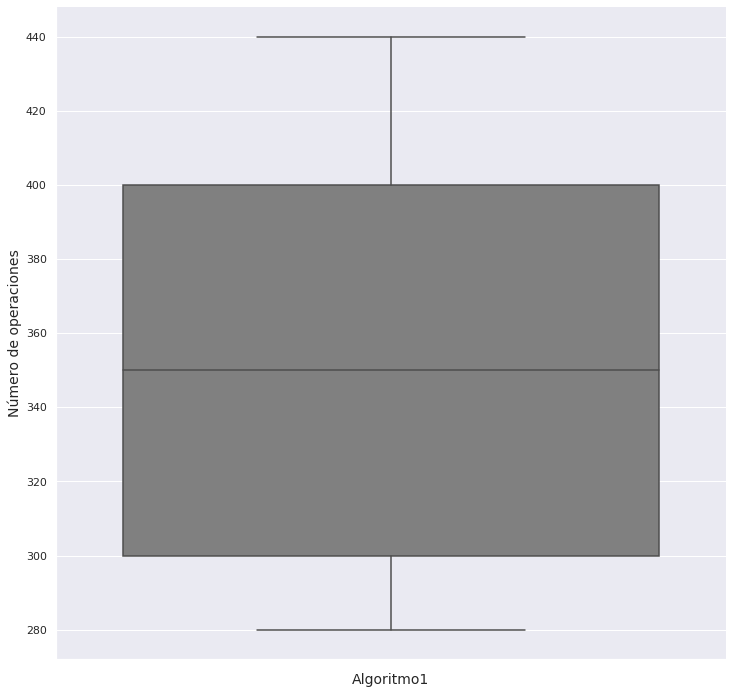

In [128]:
#Graficando
sns.boxplot(y="Algoritmo1", data=df2, color = 'gray')
plt.xlabel(r'Algoritmo1', fontsize = 14)
plt.ylabel(r'Número de operaciones', fontsize = 14)
sns.despine()
fig1.savefig('/content/drive/My Drive/Estadística/7Problemas/Algoritmo1.png', dpi=300)
plt.show()

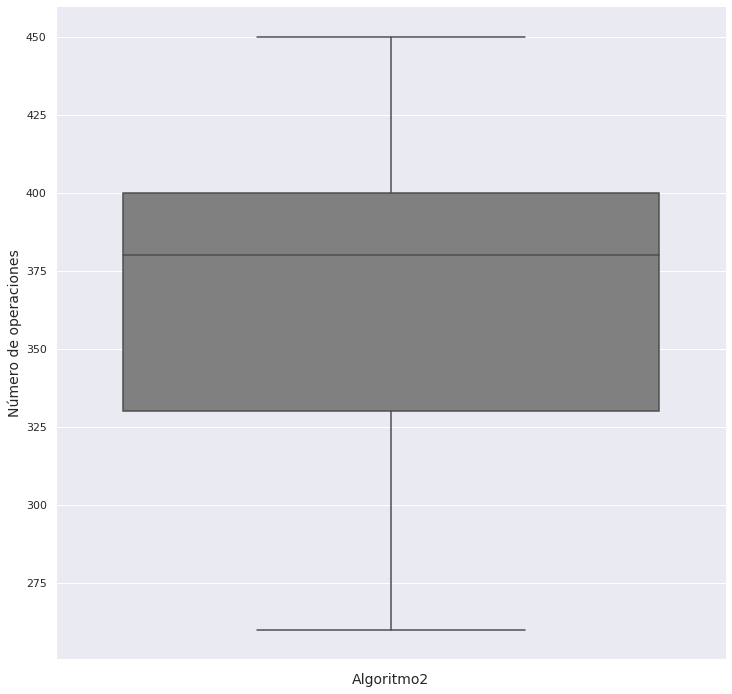

In [129]:
#Graficando
#Graficando
sns.boxplot(y="Algoritmo2", data=df2, color = 'gray')
plt.xlabel(r'Algoritmo2', fontsize = 14)
plt.ylabel(r'Número de operaciones', fontsize = 14)
sns.despine()
fig1.savefig('/content/drive/My Drive/Estadística/7Problemas/Algoritmo2.png', dpi=300)
plt.show()

Podemos ver de las gráficas de caja que el algoritmo 1 es más simétrico, debido a que la media y la mediana casi coinciden, mientras que en el algoritmo 2 están más alejadas.
Además, podemos ver que en el algoritmo 1 hay más valores que entran al rango de la caja, mientras que en el algoritmo 2 existen muchos valores del rango que se salen de la caja.


3. Un algoritmo genètico es un algoritmo de bùsqueda que utiliza nùmeros aleatorios para generar una población de individuos (o conjunto de soluciones potenciales), los cuales eventualmente se reducen mediante un proceso de cruza y mutaciòn aleatoria. Llevar un conteo de la tasa de cruza o mutaciòn suele ser de interès para medir el desempeño del algoritmo al compararlo con otras tècnicas. Los algoritmos genèticos han sido aplicados exitosamente en problemas de diseño, construcciòn de antenas, ADN, proteìnas, algoritmos de clàsificacion automàtica, etc. Los siguientes datos representan el nùmero de cruzamientos realizados durante la ejecuciòn del algoritmo en 500 posibilidades de cruza por ejecuciòn.

In [55]:
#Leer el archivo de texto de la 3
df3 = pd.read_csv('/content/drive/My Drive/Estadística/7Problemas/3.csv')
df3

,Algoritmo1,Algoritmo2
0,400.0,320
1,200.0,350
2,350.0,300
3,450.0,280
4,480.0,290
5,360.0,300
6,100.0,320
7,NaN,400


a) Calcule la media, el rango y la desviaciòn estàndar de los datos.

In [0]:
m3 = df3.mean(axis = 0, skipna = True)
s3 = df3.std(axis = 0, skipna = True)
r = df3.max(axis = 0, skipna = True) - df3.min(axis = 0, skipna = True)

In [57]:
m3

Algoritmo1    334.285714
Algoritmo2    320.000000
dtype: float64

In [58]:
s3

Algoritmo1    137.095726
Algoritmo2     38.913824
dtype: float64

In [59]:
r

Algoritmo1    380.0
Algoritmo2    120.0
dtype: float64

b) ¿Qué algoritmo presenta mayor variabilidad? ¿Las diferencias son significativas?

In [60]:
V3 = s3**2
V3

Algoritmo1    18795.238095
Algoritmo2     1514.285714
dtype: float64

El algoritmo 2 presenta la mayor variabilidad. Y sí; las diferencias son del orden 10.

c) ¿Què algoritmo tuvo mayor dispersiòn del total de cruzamientos?


El algoritmo 1 en definitiva. Su varianza y su desviación fueron mayores.

d) Considerando que entre màs alta sea la tasa de cruzamiento (total de cruzas 500) el desempeño es mejor, ¿què algoritmo resulta más conveniente? 

El algoritmo 1, puesto que su media fue mayor.


4. En el problema anterior considere el nùmero de cruzamientos con un tercer algoritmo

In [61]:
#Agregando el 3er algoritmo de la 4
df4 = pd.read_csv('/content/drive/My Drive/Estadística/7Problemas/4.csv')
df4

,Algoritmo1,Algoritmo2,Algoritmo3
0,400.0,320.0,450
1,200.0,350.0,400
2,350.0,300.0,100
3,450.0,280.0,140
4,480.0,290.0,300
5,360.0,300.0,200
6,100.0,320.0,120
7,NaN,400.0,100
8,NaN,NaN,80
9,NaN,NaN,490


a) Calcule la media, rango y desviaciòn estándar y explique cuàl de los tres algoritmos cree usted que es el mejor y por què

In [0]:
#Calculando la media, el rango y la desviación estándar

m4 = df4.mean(axis = 0, skipna = True)

r4 = df4.max(axis = 0, skipna = True) - df4.min(axis = 0, skipna = True)

s4 = df4.std(axis = 0, skipna = True)

In [63]:
m4

Algoritmo1    334.285714
Algoritmo2    320.000000
Algoritmo3    286.538462
dtype: float64

In [64]:
r4

Algoritmo1    380.0
Algoritmo2    120.0
Algoritmo3    410.0
dtype: float64

In [65]:
s4

Algoritmo1    137.095726
Algoritmo2     38.913824
Algoritmo3    166.675641
dtype: float64

El algoritmo 2, debido a que su media está tan distanciada del algoritmo 1 (el cual es el más alto), pero su desviación estándar no es elevada ni su rango disperso.

b) Si el interès principal es el promedio de cruzas, què algoritmo es màs confiable en su promedio (no confundir esta pregunta con cuàl algoritmo tiene el promedio más alto).

Como la desviación estándar es menor en el algoritmo 2, su promedio es más representativo.

c) Use el SPSS y construya un diagrama de caja triple con los datos de los tres algoritmos y discuta las caracterìsticas sobresalientes en la comparaciòn.

In [66]:
n = []

for i in range(len(df4['Algoritmo1'])):
  n.append(1)


for i in range(len(df4['Algoritmo2'])):
  n.append(2)

for i in range(len(df4['Algoritmo3'])):
  n.append(3)

Alg = []

for i in range(len(df4['Algoritmo1'])):
  Alg.append(df4.Algoritmo1[i])


for i in range(len(df4['Algoritmo2'])):
  Alg.append(df4.Algoritmo2[i])

for i in range(len(df4['Algoritmo3'])):
  Alg.append(df4.Algoritmo3[i])

df42 = pd.DataFrame({'Algoritmo': n, 'Dato': Alg})
df42

,Algoritmo,Dato
0,1,400.0
1,1,200.0
2,1,350.0
3,1,450.0
4,1,480.0
5,1,360.0
6,1,100.0
7,1,NaN
8,1,NaN
9,1,NaN


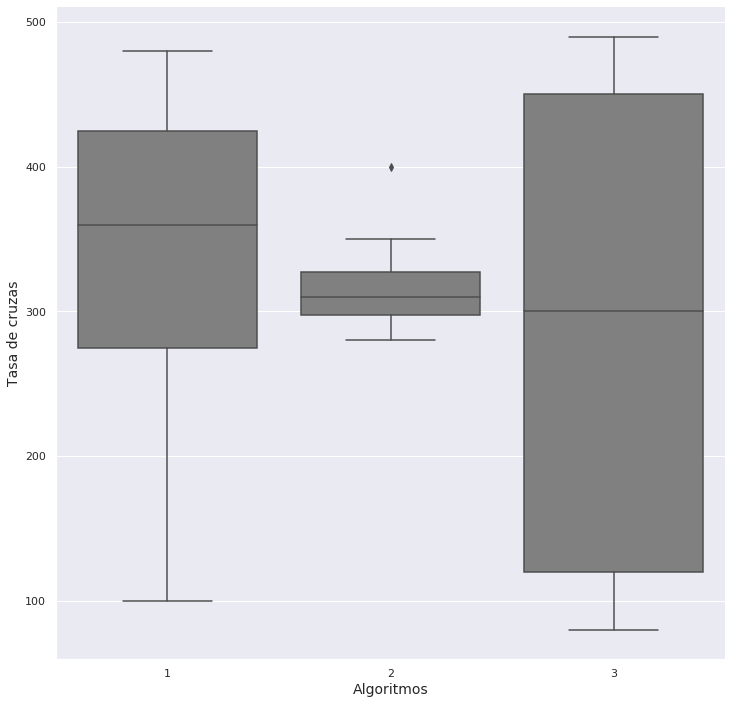

In [127]:
#Graficando
sns.boxplot(x = 'Algoritmo', y="Dato", data=df42, color = 'gray')
plt.xlabel(r'Algoritmos', fontsize = 14)
plt.ylabel(r'Tasa de cruzas', fontsize = 14)
sns.despine()
fig1.savefig('/content/drive/My Drive/Estadística/7Problemas/Algoritmos4.png', dpi=300)
plt.show()

Se puede observar que para el algoritmo 1 los datos tienen más peso hacia la derecha, además de que la media está más alejada de la mediana que en los otros casos, además, en el algoritmo 2 vemos que muy pocos datos del rango están dentro del rectángulo, lo que indica una mayor dispersión, y por último, en el algoritmo 3, podemos ver un comportamiento muy uniforme, ya que la media es muy cercana a la mediana y casi todos los datos pertenecen al rectángulo. 

5. Suponga que en una muestra con n = 30 datos, la media resultó 60 y la cuasivarianza 10. ¿Cuàl es la varianza y desviaciòn estàndar muestral?


 Si tenemos que la varianza se calcula como
 

 $s^2 = \frac{\sum_{i = 1}^n x_i^2 - n\overline{x}^2}{n-1}$
 
Entonces la cuasivarianza se calcularía como


 $cs^2 = \frac{\sum_{i = 1}^n x_i^2 - n\overline{x}^2}{n}$
 
 
Como ambas fórmulas tienen el mismo término en la parte del numerador, se nombra “A” en ambos casos

$s^2 = \frac{A}{n-1}$

$cs^2 = \frac{A}{n}$

Se despeja A de ambas fórmulas y se igualan las ecuaciones

$(n-1)s^2= A$

$ncs^2=A$
   
$(n-1)s^2 = ncs^2$ 

Se despeja $s^2$


$s^2 =\frac{ncs^2}{n-1}$



Resultando en $s^2 = 10.34482759$


Para obtener la desviación estándar, se saca la raíz cuadrada

 $s = 3.216337605$


6. Sabemos que por conveniencia matemàtica, el indicador preferido para medir la variación de los datos es la varianza (función cuadrática) que nos da una medida representativa o promedio de las desviaciones al cuadrado de cada dato con respecto a su media. Lo anterior se debe a que la función cuadrática es más fácil de manejar algebraicamente que la función valor absoluto. Sin embargo, en algunas aplicaciones la desviación absoluta representa un error de medición (sin signo) y puede ser un mejor índice de medición física en lugar de la desviación estándar. Por ejemplo, suponga que los datos representan las mediciones de un termómetro a calibrar su temperatura a exactamente 0 C en el proceso de fabricaciòn, es decir, si el termómetro está bien calibrado, la temperatura que debe marcar en la prueba siempre de ser cero. Las temperaturas medidas en 16 termómetros diferentes son:

In [68]:
#Leyendo los datos de la 6
df6 = pd.read_csv('/content/drive/My Drive/Estadística/7Problemas/6.csv')
df6

,Temperatura
0,2.00
1,0.00
2,1.50
3,-2.00
4,0.00
5,-3.20
6,1.00
7,4.00
8,0.00
9,-3.10


In [0]:
#Calculando la media, la desviación estándar, la varianza, la desviación promedio absoluta y el rango
m6 = df6.mean(axis = 0, skipna = True)
s6 = df6.std(axis = 0, skipna = True)
v6 = s6**2
sa6 = df6.mad(axis = 0, skipna = True)
r6 = df6.max(axis = 0, skipna = True) - df6.min(axis = 0, skipna = True)

In [70]:
#Media
m6

Temperatura    0.088125
dtype: float64

Temperatura    0.088125
dtype: float64

In [71]:
#Desviación estándar
s6

Temperatura    1.876934
dtype: float64

Temperatura    1.876934
dtype: float64

In [72]:
#Varianza
v6

Temperatura    3.522883
dtype: float64

Temperatura    3.522883
dtype: float64

In [73]:
#Desviación promedio absoluta
sa6

Temperatura    1.346406
dtype: float64

Temperatura    1.346406
dtype: float64

In [74]:
#Rango
r6

Temperatura    7.2
dtype: float64

Temperatura    7.2
dtype: float64

a) Sugieren los datos que los termómetros están calibrados a temperatura ideal ¿si, no y por qué?

A simple vista, con los datos registrados, se ve que arrojan valores muy diversos, llegando a ser 0 solo en una ocasión de las 12, bajo esta primera vista, parece ser que el termómetro no está bien calibrado, casi ningún dato concuerda con el esperado 

b) ¿Sugieren los datos que en promedio la muestra de termómetros están bien calibrados? ¿Qué tanto se desvía de la temperatura ideal? ¿Es esta desviación un valor que debe preocupar a los fabricantes?  


Se puede observar que la media es igual a -0.0325. Si el termómetro estuviera bien calibrado, tendríamos que el promedio sería 0, pero no es el caso, por lo que aún no está del todo bien calibrado, aun así, este valor no debería de ser preocupante para los fabricantes.


Por otro lado, usando la media muestral y poniendo un intervalo de confianza, se tiene que ese rango contiene al 0, por lo tanto bajo esas condiciones si estaría calibrado dentro de lo aceptable.





c) Calcule la desviación absoluta promedio con respecto a la media muestral y la desviación absoluta con respecto a la temperatura ideal. ¿Cuál desviaciòn es mejor para medir la calibraciòn de los termómetros? 



La varianza absoluta medida de la media muestral es 1.1, mientras que la varianza absoluta respecto a la temperatura ideal es de -0.0325, si queremos medir que tan preciso es el instrumento, es mejor utilizar el 1.1, ya que nos habla de que tanto varían los valores del termómetro en sí (depende del instrumento) , y si queremos saber la exactitud, es mejor utilizar el -0.0325, ya que nos dice que tan alejado están los valores del valor ideal que se espera medir (depende de la medida ideal que se quiera) así que es mejor usar la variación respecto a la media para ver la calidad del instrumento. 

d) En este ejemplo, ¿cuál considera que es una mejor medida física para medir las desviaciones de las temperaturas? ¿La desviaciòn promedio absoluta o la desviaciòn estándar? ¿Por què?

Es mejor usar la desviación absoluta promedio, ya que muestra literalmente que tanto se alejan las medidas de la media y saca su promedio, mientras que la desviación estándar trabaja con una formula que es útil operacionalmente pero fisicamente no esta hablando de nada que represente al aparato o al sistema. 

e) Calcule la desviación estándar muestral y diga qué representa

La desviación estándar es de 1.877 y representa cuanto se alejaron las medidas de la media si la muestra fuera muy grande o infinita, además de que es útil para establecer cotas de confianza para detectar errores atípicos en las muestras. 

f) ¿Con base en la media $\overline{x}$ y desviación estándar $s$ y desviación absoluta promedio, ¿son los 10 termòmetros de la muestra fabricados por la compañìa aceptables o de buena calidad?

Si se usa el criterio de una desviación estándar o una desviación absoluta promedio sumado y restado de la media para obtener un rango de confianza, en ambos casos se ve que se contiene a la temperatura 0, entonces serían termómetros que tendrían una calidad aceptable. 

g) ¿Con base en la respuesta del inciso anterior, se puede inferir los resultados a todos los termómetros fabricados por la compañía? Si la respuesta es no, explique por qué. En este caso, comente que habría que realizar para extender los resultados hacia toda la población de termómetros. Aquí el detalle es que la media muestral $x$ y varianza muestral $s^2$ sólo representan a los 10 termómetros analizados. La estadística inferencial pretende ir más allá; caracterizar a toda la poblaciòn.


Si se quiere representar a toda la población de termómetros se tiene que obtener los valores de los parámetros $\mu$ y $\sigma^2$ . 

Para el caso de la varianza, se sabe que $s^2$ es un estimador insesgado de $\sigma^2$ , por lo tanto, se puede afirmar que

 $\sigma^2 = s^2$

También se sabe que la media muestral es un estimador insesgado de la media poblacional, entonces se puede decir que


 $\mu = \overline{x}$ 
 
De esta manera ya se tiene la información sobre la población de termómetros, y se puede afirmar que por los valores que obtenidos anteriormente, son de buena calidad. 

7. (Ejemplo tomado del libro de Jay Devore, p.37) Localizar puntos alejados. Los efectos de descargas parciales en la degradación de materiales para cavidades aislantes tienen implicaciones importantes en relación con las duraciones de componentes de alto voltaje, Considere la siguiente muestra de $n = 25$ anchos de pulso de descargas lentas en una cavidad cilìndrica de polietileno. Un artìculo publicado señala el impacto de una amplia variedad de herramientas estadìsticas en la interpretación de datos de descarga, entre ellos el anàlisis de la distribuciòn, dispersiòn y simetrìa mediante un diagrama de caja. 

Datos de descarga parcial (voltajes) en la degradaciòn de materiales para cavidades aislantes


In [85]:
#Leyendo los datos de la 7
df7 = pd.read_csv('/content/drive/My Drive/Estadística/7Problemas/7.csv')
df7

,Voltajes
0,5.3
1,8.2
2,13.8
3,74.1
4,85.3
5,88.0
6,90.2
7,91.5
8,92.4
9,92.9


a) Determine el primero, segundo y tercer cuartil. Verifique que los siguientes càlculos son correctos.

In [95]:
q = len(df7)/4

if q/math.ceil(q)<1:
  Q_1 = (df7.Voltajes[math.ceil(q)] + df7.Voltajes[math.floor(q)])/2
elif q/math.ceil(q)==1:
  Q_1 = df7.Voltajes[q]

if 2*q/math.ceil(2*q)<1:
  Q_2 = (df7.Voltajes[math.ceil(2*q)] + df7.Voltajes[math.floor(2*q)])/2
elif 2*q/math.ceil(2*q)==1:
  Q_2 = df7.Voltajes[2*q]

if 3*q/math.ceil(3*q)<1:
  Q_3 = (df7.Voltajes[math.ceil(3*q)] + df7.Voltajes[math.floor(3*q)])/2
elif 3*q/math.ceil(3*q)==1:
  Q_3 = df7.Voltajes[3*q]

Q = [Q_1, Q_2, Q_3]
Q

[90.85, 94.85, 97.9]

Difieren, puesto que en esa tabla redondea hacia arriba el valor del cuartil, en lugar de tomar el promedio cuando es un float.

b) Elabore un diagrama de caja con los datos originales, esta gràfica de caja se hace con los 5 puntos Min, $Q_1$, $Q_2$, $Q_3$ y el Max.

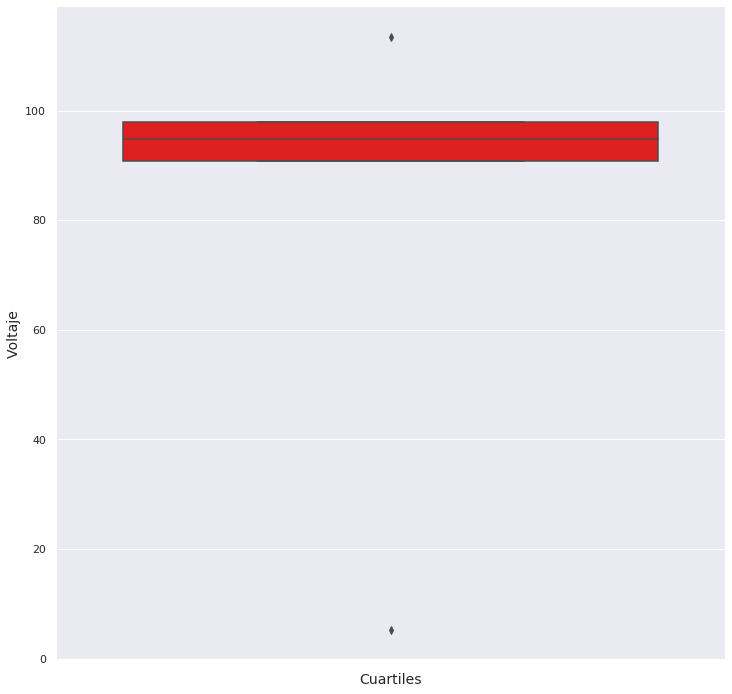

In [126]:
Q2 = []
Q2.append(float(df7.min(axis = 0, skipna = True)))
Q2.append(Q_1)
Q2.append(Q_2)
Q2.append(Q_3)
Q2.append(float(df7.max(axis = 0, skipna = True)))
df7b = pd.DataFrame({'Cuartil': Q2})

#Graficando
sns.boxplot(y="Cuartil", data=df7b, color = 'red')
plt.xlabel(r'Cuartiles', fontsize = 14)
plt.ylabel(r'Voltaje', fontsize = 14)
sns.despine()
fig1.savefig('/content/drive/My Drive/Estadística/7Problemas/VoltajeQ.png', dpi=300)
plt.show()

c) Señale los valores sospechosos que pueden ser datos apartados “moderados” o “extremos” con relaciòn al grupo central de datos.

d) Determine el rango intercuartil $RI$, (denotado con $f_s$ o disperción de los cuartos en el libro de Jay Devore). Verifique que la siguiente tabla de valores es correcta.

![Texte alternatif…](https://drive.google.com/uc?id=1LIP22xPGusMXPI5sQEYbvukNdamlxugK)

f) Utilice la información de la tabla anterior y determine analìticamente los cinco datos atìpicos (outliers) y etiquètelos si son datos alejados “moderados” o “extremos”.

g) Construya de nuevo el diagrama de caja modificado con los puntos $a_1$, $Q_1$, $Q_2$, $Q_3$ y $a_2$ màs los outliers; en esta gràfica los datos alejados “moderados” se marcan con un punto y los datos apartados “extremos” con un cìrculo.

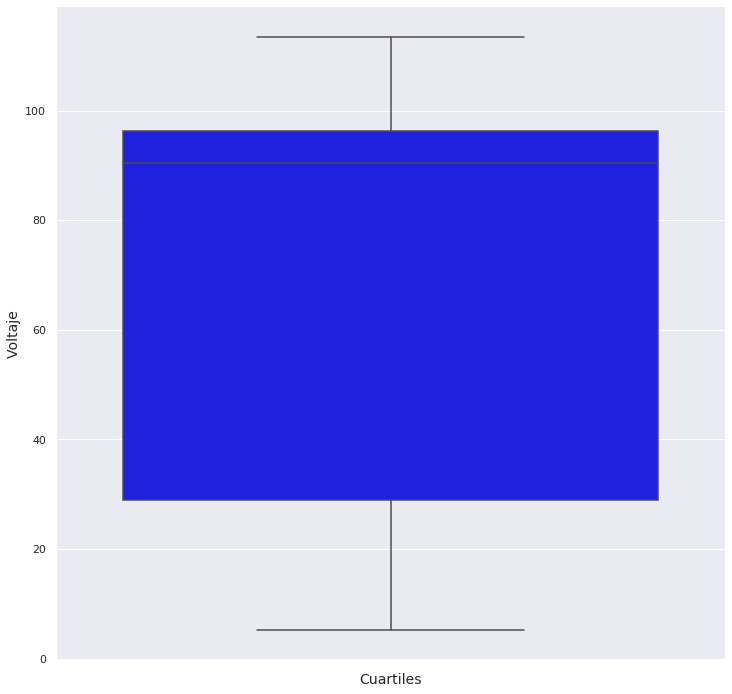

In [125]:
g = []
for i in range(0, 4):
  g.append(df7.Voltajes[i])

for i in range(0, 3):
  g.append(Q[i])

a1 = 90.2
a2 = 96.8
g.append(a1)
g.append(a2)
g.append(float(df7.max()))

df7c = pd.DataFrame({'Outlier': g})

#Graficando
sns.boxplot(y="Outlier", data=df7c, color = 'blue')
plt.xlabel(r'Cuartiles', fontsize = 14)
plt.ylabel(r'Voltaje', fontsize = 14)
sns.despine()
fig1.savefig('/content/drive/My Drive/Estadística/7Problemas/VoltajeQ2.png', dpi=300)
plt.show()

h) Compare el diagrama de caja del inciso b) con el diagrama del inciso f). Comente las características importantes de la distribuciòn de los datos. ¿Cuál de los dos diagramas de caja considera que es mejor y porque para visualizar la distribuciòn y dispersiòn de los datos, el primer diagrama sin considerar outliers o el segundo diagrama considerando outliers?

Se puede ver que el segundo diagrama de caja se ve mucho más centrado, además de que es más sencillo ver los detalles de la gráfica sin valores extremos que extiendan los bigotes innecesariamente, por lo que considero que es mucho mejor deshacerse al menos de los outliers extremos.

9. Los siguientes datos representan 100 nùmeros aleatorios generados en el intervalo (0,10) supuestamente con una distribuciòn uniforme.

In [106]:
df9 = pd.read_csv('/content/drive/My Drive/Estadística/7Problemas/9.csv')
df9

,Distribucion
0,3.82
1,2.45
2,3.71
3,9.51
4,0.74
...,...
105,1.32
106,6.86
107,7.38
108,7.96


a) Elabore un histograma de frecuencias relativas utilizando 10 clases y comente si los datos a simple vista parecen provenir o no de una distribuciòn constante. La distribuciòn uniforme es una función constante igual a

$f(x) = \frac{1}{b-a}$ para $a\leq x\leq b$, donde $a = 0$, $b = 10$

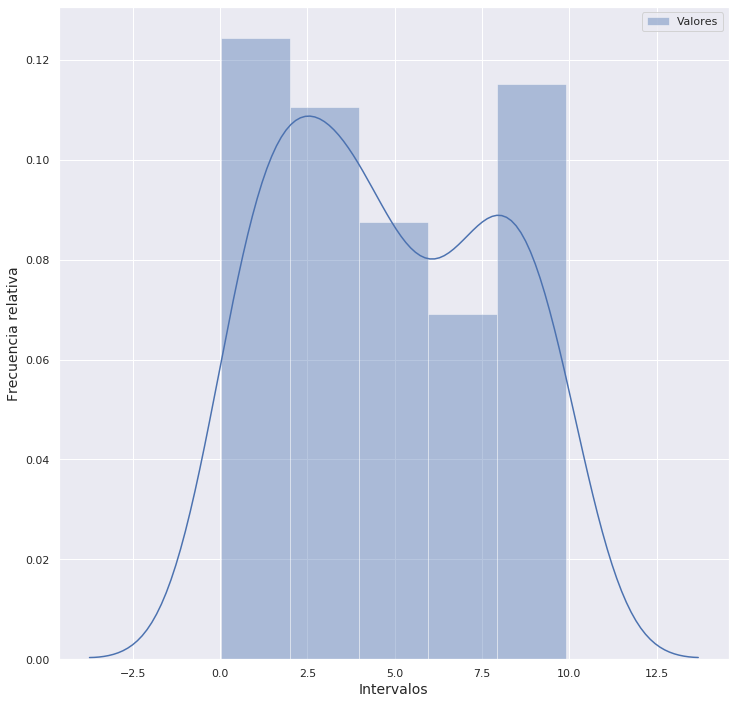

<Figure size 864x864 with 0 Axes>

In [122]:
#Graficando
sns.distplot(df9['Distribucion'], label = r'Valores')
plt.legend()
plt.xlabel(r'Intervalos', fontsize = 14)
plt.ylabel(r'Frecuencia relativa', fontsize = 14)
#title(r'Distribución', fontsize = 18)
#sns.despine()
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('/content/drive/My Drive/Estadística/7Problemas/Histograma.png', dpi=300)

A simple vista por la gráfica, podemos ver que no se parece a una distribución uniforme, puesto que en los intervalos la frecuencia no se presenta de manera... Bueno... Uniforme.

b) La media poblacional $\mu$ y varianza poblacional $\sigma$ teóricas esperadas para números aleatorios con distribución uniforme en el intervalo ($a$, $b$) vienen dadas por las fórmulas

$\mu = \frac{a-b}{2} \longrightarrow \mu = 5$

$\sigma^2 = \frac{(a-b)^2}{12} \longrightarrow \sigma^2 = \frac{25}{3}$


c) Obtenga las estadìsticas muestrales de media $\overline{x}4 y varianza $s^2$. ¿Observa usted que estos valores se parecen a los parámetros poblacionales $\mu$ y $\sigma^2$ ? Si no son idènticos, ¿es natural que difieran? ¿Sí, no y por qué? 

Se tiene que


$\overline{x} = 4.8493$


$s^2 = 9.5606$

No lo son, y es normal, debido a que los estimadores que se obtienen de la muestra no siempre serán idénticos a los parámetros. El punto es aproximarse.

d) ¿En cuánto se espera que difiera $\overline{x}$ del valor teórico esperado $\mu$? ¡Bingo! A este cálculo se le llama Error típico de la media. Este error justamente depende de cómo es el muestreo, con reemplazo o sin reemplazo.

Obteniendo el error típico de la media

$E_{tm} = \frac{\sigma}{\sqrt{n}} \longrightarrow E_{tm} = 0.2886751346$

Si se usa el error típico en la media para sacar un rango sumando y restando a la media muestral, en el rango se contendrá el parámetro poblacional.

